# Visualizing Market Data

### Setup and Loading Packages

In [11]:
# Import relevant packages
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

### Time Plots

Specifying stock ticker, start date, and end date. In our example, the stock is apple (Ticker: AAPL).

In [4]:
TICKER = 'AAPL' # Stock Ticker symbol
START_DATE = '2014-06-01' # Stock data start date
END_DATE = '2024-06-01' # Stock data end date

# Store price details into a variable
stockPx = yf.download(TICKER, START_DATE, END_DATE)

[*********************100%***********************]  1 of 1 completed


Extracting adjusted close prices of Apple's stock from Yahoo Finance.

<Axes: title={'center': 'AAPL Daily Prices'}, xlabel='Date', ylabel='Price in USD ($)'>

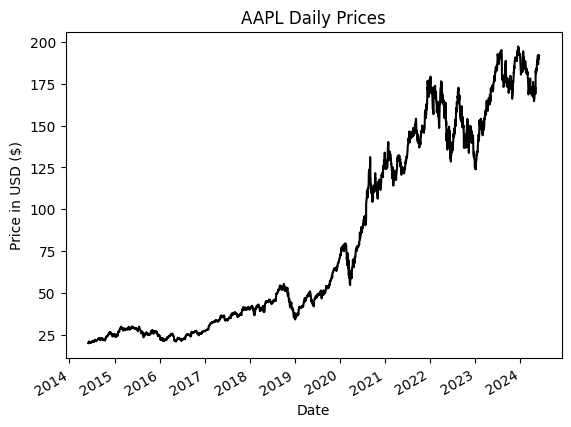

In [5]:
stockPxAj = stockPx['Adj Close'] # Index adjusted close price column
stockPxAj.plot(title = TICKER + ' Daily Prices', ylabel = 'Price in USD ($)', color = 'k') # Plot time plot

Calculate the log returns.

<Axes: title={'center': 'AAPL Daily Log Returns'}, xlabel='Date', ylabel='Log Return'>

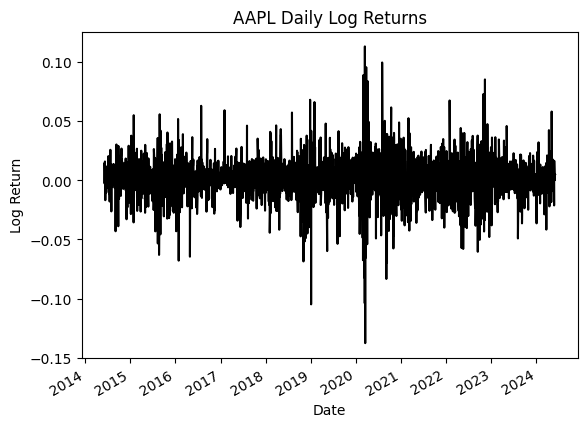

In [8]:
stockLogRet = np.log(stockPxAj).diff().dropna() # Calculate log returns and drop null values
stockLogRet.plot(title = TICKER + ' Daily Log Returns', ylabel = 'Log Return', color = 'k') # Plot time plot

### Scatter Plots

Specifying your asset tickers and their data duration

In [9]:
TICKER1 = 'ADBE' # Enter the stock 1 ticker here
TICKER2 = 'CMG' # Enter the stock 2 ticker here
TAU = 5          # Enter the lookback period of your data

Visualizing the relationship between ADBE and CMG log returns.

[*********************100%***********************]  2 of 2 completed


Text(0.5, 1.0, 'Scatter Plot ADBE vs CMG')

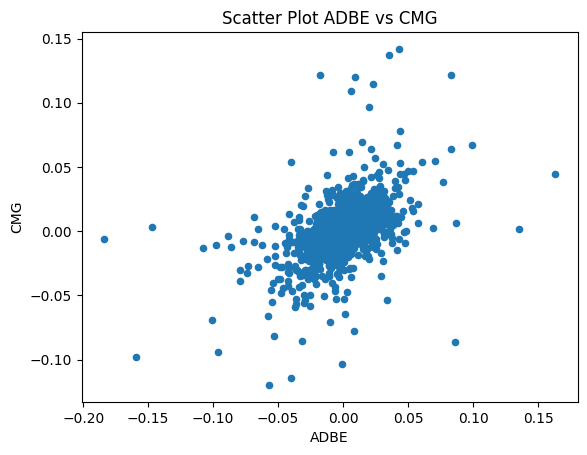

In [12]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # Data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # Data end date

stockPxPair = yf.download([TICKER1, TICKER2], START_DATE, END_DATE)['Adj Close'] # Retrieve adjusted close price data from yahoo finance

stockLogRetPair = np.log(stockPxPair).diff().dropna() # Calculate log returns and drop null values
stockLogRetPair.plot.scatter(x=TICKER1, y=TICKER2) # Plot scatter plot
plt.title('Scatter Plot ' + TICKER1 + ' vs ' + TICKER2) # Label title